In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from pickle import dump
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('../data/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(6607, 20)

In [4]:
(df == 0).sum()

Hours_Studied                    0
Attendance                       0
Parental_Involvement             0
Access_to_Resources              0
Extracurricular_Activities       0
Sleep_Hours                      0
Previous_Scores                  0
Motivation_Level                 0
Internet_Access                  0
Tutoring_Sessions             1513
Family_Income                    0
Teacher_Quality                  0
School_Type                      0
Peer_Influence                   0
Physical_Activity               46
Learning_Disabilities            0
Parental_Education_Level         0
Distance_from_Home               0
Gender                           0
Exam_Score                       0
dtype: int64

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
n_var = df.select_dtypes(include=['number']).columns
c_var = df.select_dtypes(include=['object']).columns
print(f'Numerical Variables:\n{n_var, len(n_var) + 1}\n')
print(f'Categorical Variables:\n{c_var, len(n_var) + 1}')

Numerical Variables:
(Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object'), 8)

Categorical Variables:
(Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object'), 8)


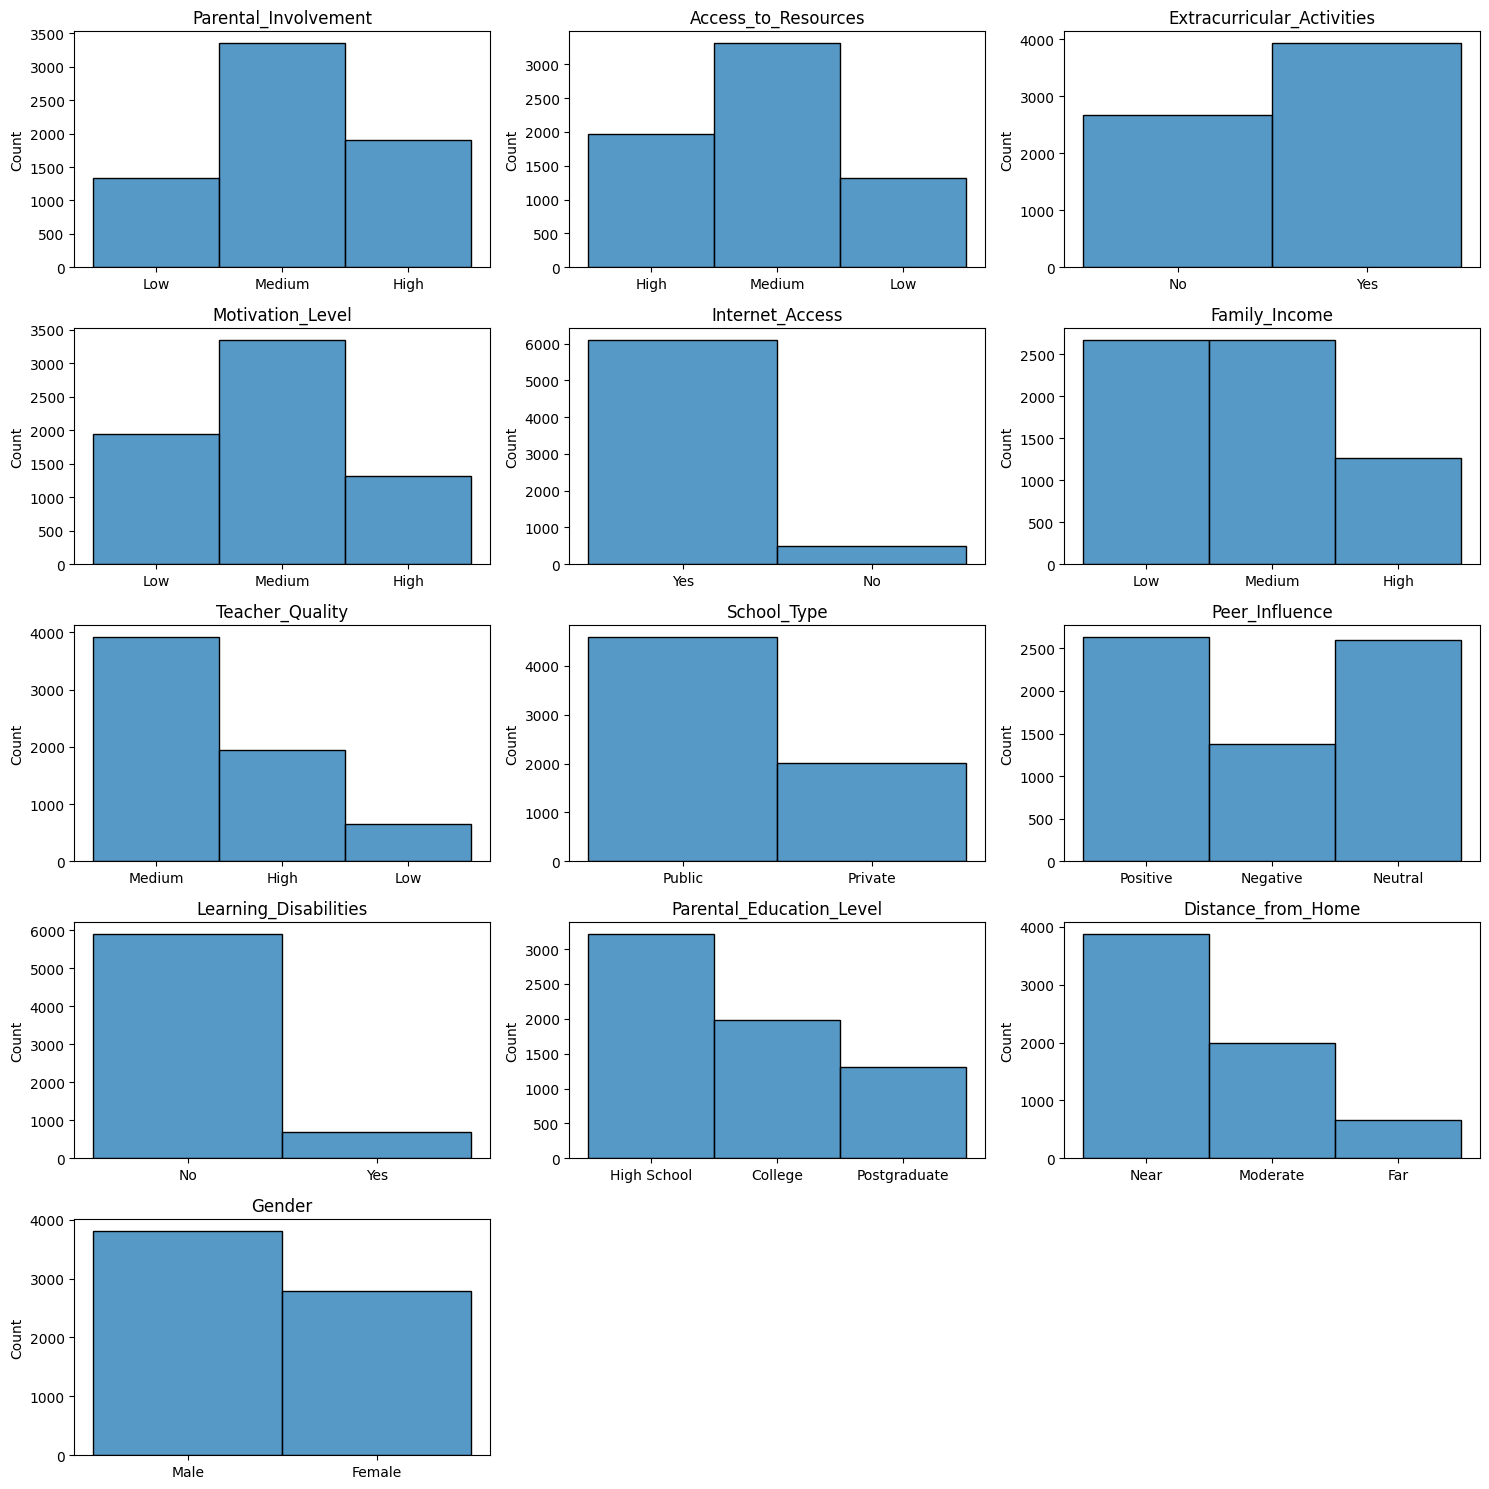

In [8]:
# Analysis of Categorical Variables

fig, axis = plt.subplots(5, 3, figsize=(15, 15))


# Flatten the axis for easy iteration
axis = axis.flatten()

# Loop over categorical columns and plot each on a separate subplot
for i, col in enumerate(c_var):
    sns.histplot(ax=axis[i], data=df, x=col)
    axis[i].set_title(col)
    axis[i].set_xlabel('')

# Remove empty subplots if any
for j in range(len(c_var), len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

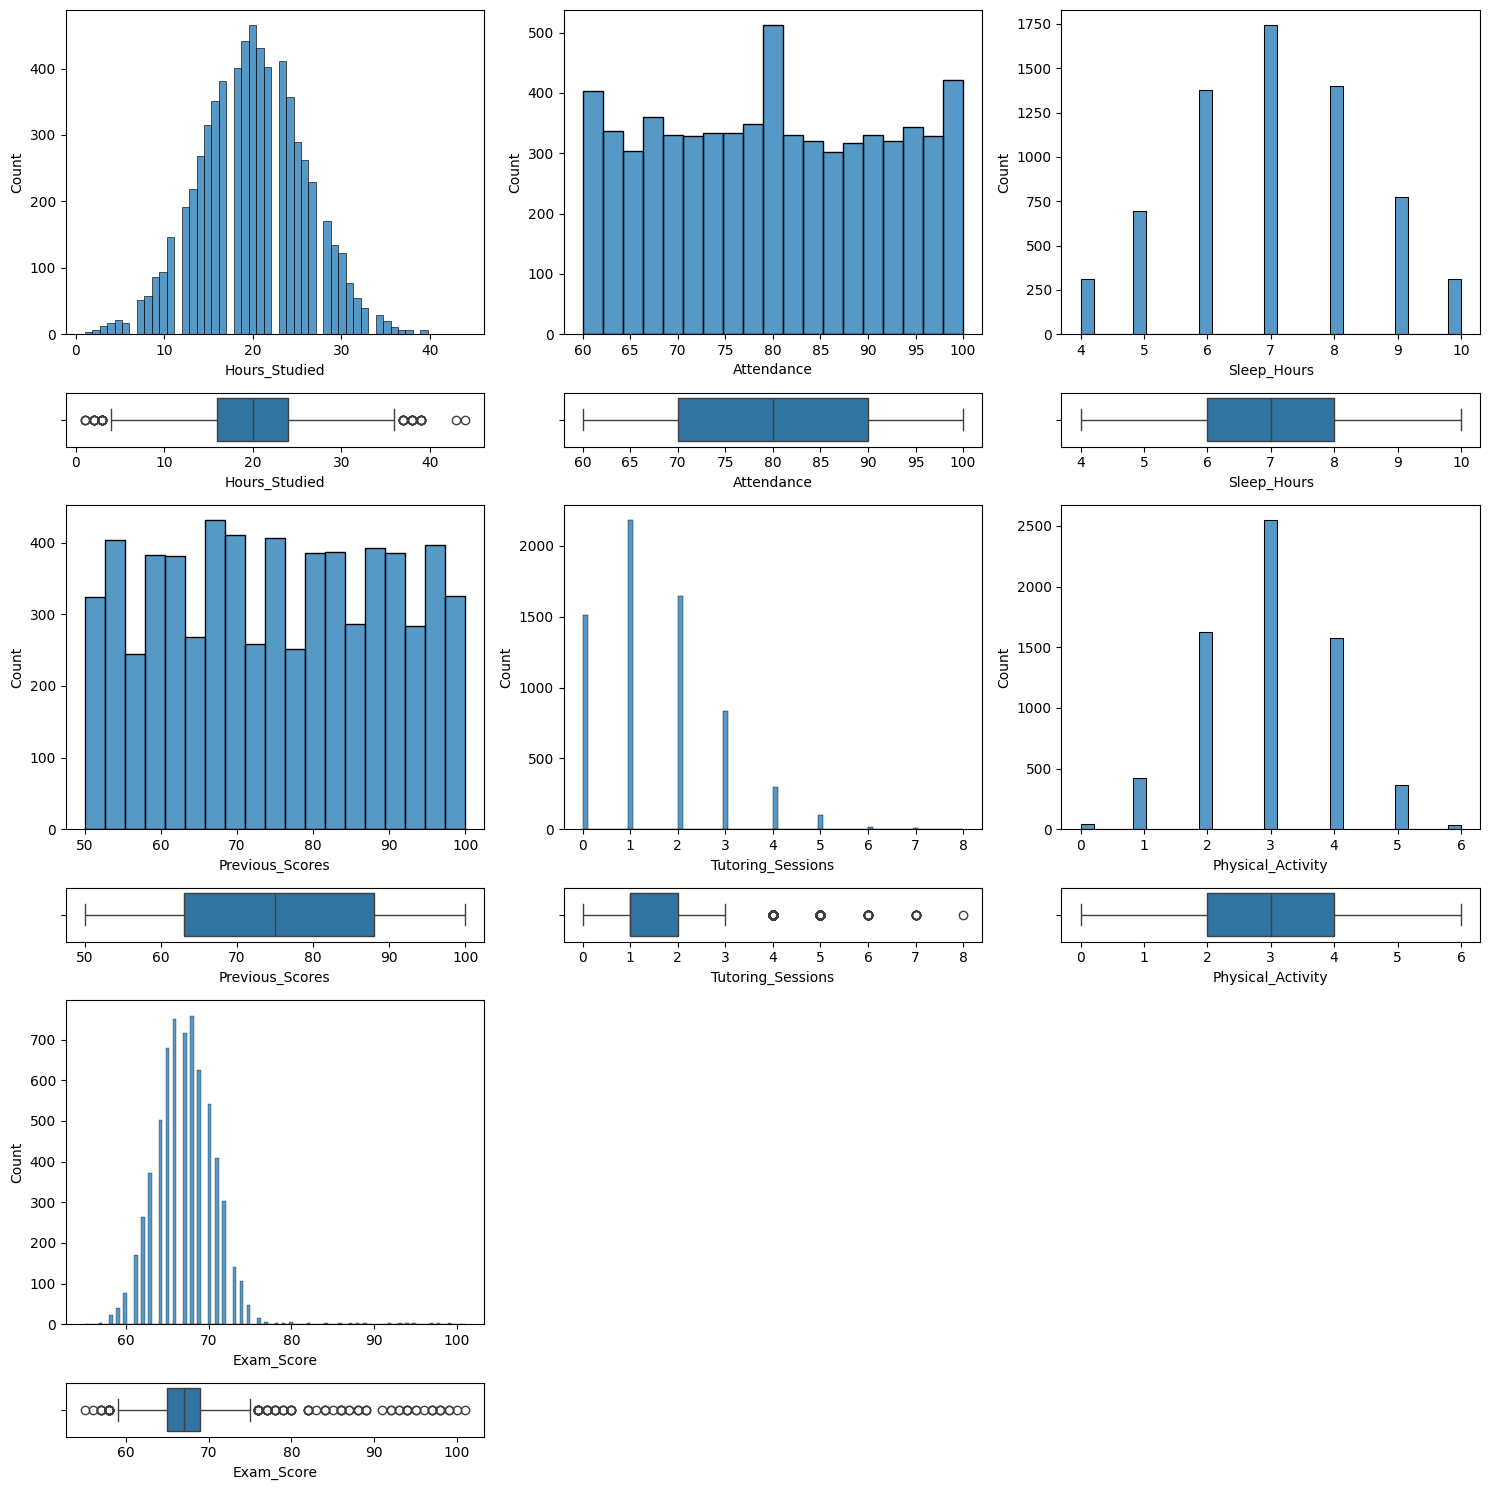

In [9]:
# Analysis of Numerical Variables

fig, axis = plt.subplots(6,3,figsize = (15,15),gridspec_kw={'height_ratios':[6,1,6,1,6,1]})

sns.histplot(ax=axis[0,0], data=df, x='Hours_Studied')
sns.boxplot(ax=axis[1,0], data=df, x='Hours_Studied')

sns.histplot(ax=axis[0,1], data=df, x='Attendance')
sns.boxplot(ax=axis[1,1], data=df, x='Attendance')

sns.histplot(ax=axis[0,2], data=df, x='Sleep_Hours')
sns.boxplot(ax=axis[1,2], data=df, x='Sleep_Hours')

sns.histplot(ax=axis[2,0], data=df, x='Previous_Scores')
sns.boxplot(ax=axis[3,0], data=df, x='Previous_Scores')

sns.histplot(ax=axis[2,1], data=df, x='Tutoring_Sessions')
sns.boxplot(ax=axis[3,1], data=df, x='Tutoring_Sessions')

sns.histplot(ax=axis[2,2], data=df, x='Physical_Activity')
sns.boxplot(ax=axis[3,2], data=df, x='Physical_Activity')

sns.histplot(ax=axis[4,0], data=df, x='Exam_Score')
sns.boxplot(ax=axis[5,0], data=df, x='Exam_Score')

fig.delaxes(axis[4,1])
fig.delaxes(axis[4,2])
fig.delaxes(axis[5,1])
fig.delaxes(axis[5,2])

plt.tight_layout()
plt.show()


In [10]:
# Pass = 1; No pass = 0

df['Pass'] = df['Exam_Score'].apply(lambda x: 1 if x >= 70 else 0)
df['Pass'].describe()

count    6607.000000
mean        0.245951
std         0.430682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Pass, dtype: float64

In [11]:
no_pass_pct = (df['Pass']==0).sum() / len(df['Pass'])
pass_pct = 1 - no_pass_pct
print(f"Pass: {len(df.loc[df.Pass == 1])}")
print(f"Pass %: {pass_pct * 100}")
print(f"Didn't Pass: {len(df.loc[df.Pass == 0])}")
print(f"Didn't Pass %: {no_pass_pct * 100}")

Pass: 1625
Pass %: 24.595126381110944
Didn't Pass: 4982
Didn't Pass %: 75.40487361888906


In [12]:
encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df[['Parental_Involvement', 'Access_to_Resources']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Parental_Involvement', 'Access_to_Resources']))

df = pd.concat([df, encoded_df], axis=1)

df.head()
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Pass', 'Parental_Involvement_High',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_High', 'Access_to_Resources_Low',
       'Access_to_Resources_Medium'],
      dtype='object')

In [13]:
df = df.drop(df[['Exam_Score','Extracurricular_Activities', 'Motivation_Level','Parental_Involvement',
       'Access_to_Resources', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
       'School_Type', 'Peer_Influence', 'Learning_Disabilities','Sleep_Hours','Physical_Activity',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender']], axis=1)
df.columns

Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
       'Pass', 'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_High',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium'],
      dtype='object')

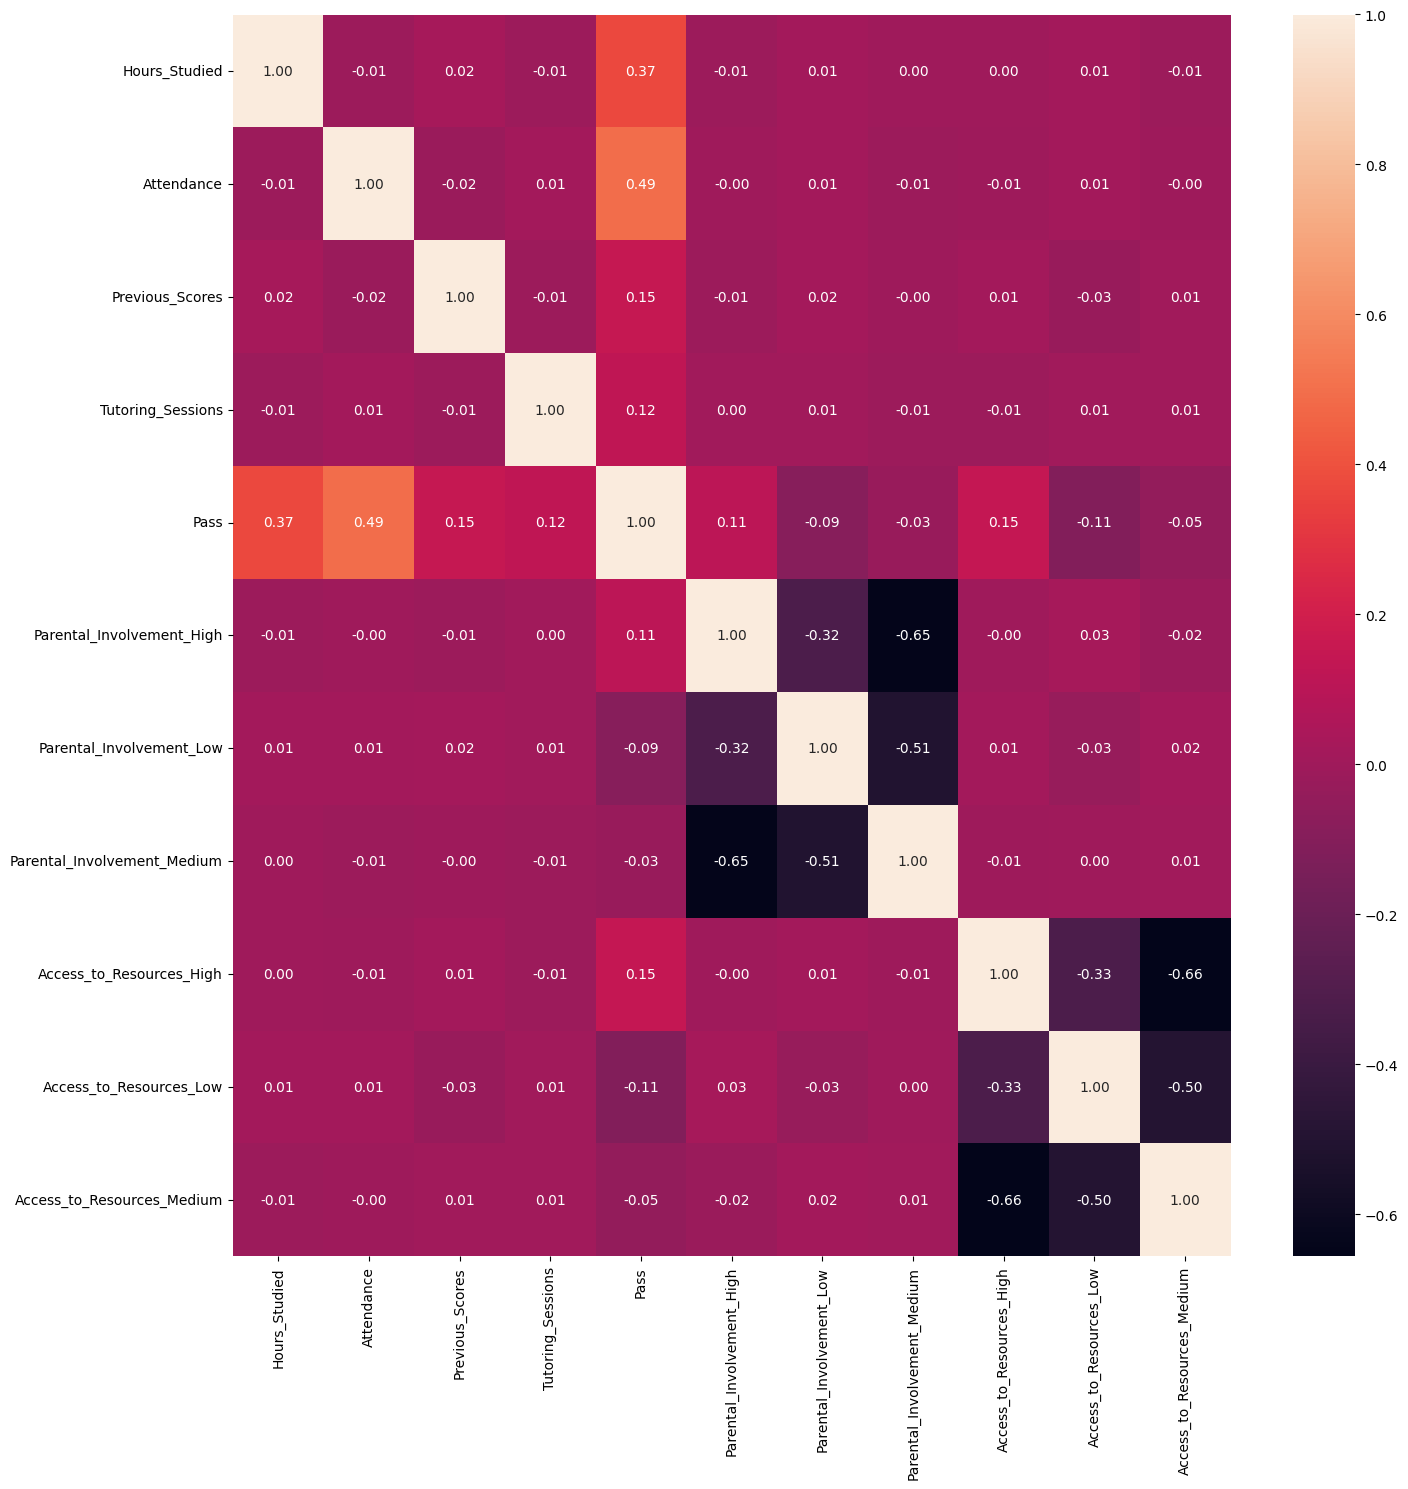

In [14]:
# Use Heatmap to find correlation to target variable 

fig, axis = plt.subplots(figsize=(15,15))

columns = df.columns

sns.heatmap(df[columns].corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

In [15]:
X = df
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
X_train.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Pass,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium
5810,27,79,63,2,0,0.0,1.0,0.0,1.0,0.0,0.0
1268,16,86,94,2,0,1.0,0.0,0.0,0.0,0.0,1.0
414,22,87,83,1,0,0.0,1.0,0.0,0.0,0.0,1.0
4745,18,100,86,1,1,1.0,0.0,0.0,0.0,0.0,1.0
654,35,78,99,1,1,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
X_train.describe()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Pass,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium
count,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000
mean,19.967077,79.873605,75.061116,1.499527,0.241627,0.288363,0.202649,0.508988,0.297067,0.199054,0.503879
std,5.993282,11.519161,14.406537,1.233464,0.428110,0.453044,0.402011,0.499967,0.457010,0.399326,0.500032
min,1.000000,60.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,63.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,80.000000,75.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,24.000000,90.000000,88.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,43.000000,100.000000,100.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X_train["Pass"] = list(y_train)
X_test["Pass"] = list(y_test)
X_train.to_csv("../data/pass_clean_train.csv", index = False)
X_test.to_csv("../data/pass_clean_test.csv", index = False)

In [19]:
train_data = pd.read_csv("../data/pass_clean_train.csv")
test_data = pd.read_csv("../data/pass_clean_test.csv")

train_data.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Pass,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium
0,27,79,63,2,0,0.0,1.0,0.0,1.0,0.0,0.0
1,16,86,94,2,0,1.0,0.0,0.0,0.0,0.0,1.0
2,22,87,83,1,0,0.0,1.0,0.0,0.0,0.0,1.0
3,18,100,86,1,1,1.0,0.0,0.0,0.0,0.0,1.0
4,35,78,99,1,1,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
X_train = train_data.drop(["Pass"], axis = 1)
y_train = train_data["Pass"].astype(int)
X_test = test_data.drop(["Pass"], axis = 1)
y_test = test_data["Pass"].astype(int)

In [21]:
# Decision Tree
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], shape=(1322,))

In [23]:
report = classification_report(y_test, y_pred)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
print(report)

Accuracy Score: 0.8661119515885023

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       974
           1       0.76      0.72      0.74       348

    accuracy                           0.87      1322
   macro avg       0.83      0.82      0.82      1322
weighted avg       0.86      0.87      0.86      1322



In [24]:
# Search for hyperparameters

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
# Best hyperparameters

grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [26]:
# Optimized Model

opt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=42)
opt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

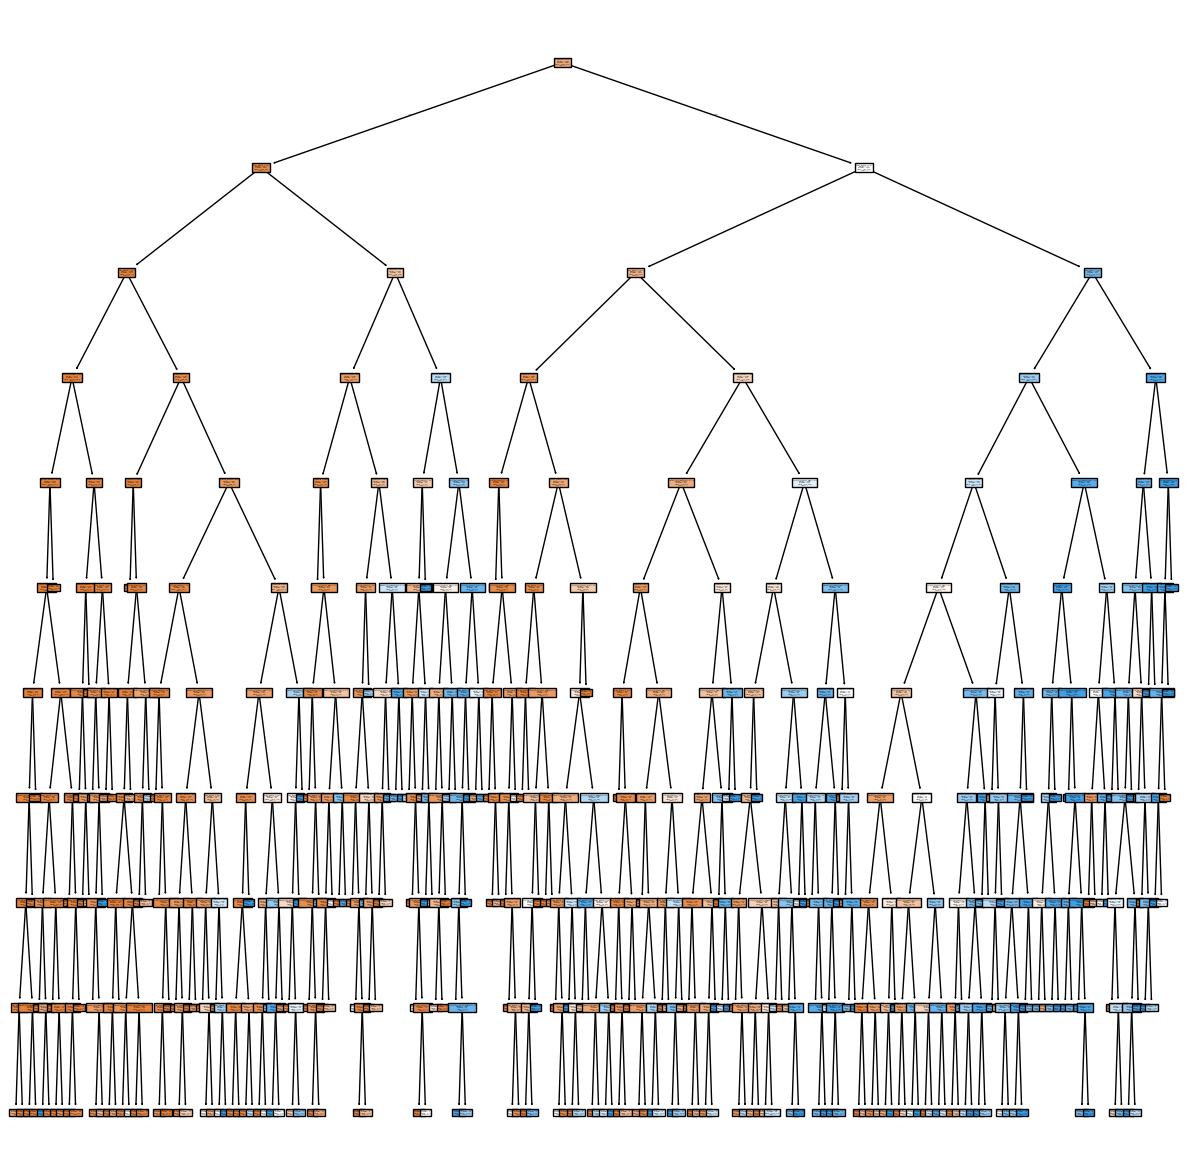

In [27]:
# Plot model

fig = plt.figure(figsize=(15,15))

tree.plot_tree(opt_model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [28]:
# Optimized y prediction

opt_y_pred = opt_model.predict(X_test)
opt_y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(1322,))

In [29]:
# Compare Reports

opt_report = classification_report(y_test, opt_y_pred)
print(f'Optimized Tree Accuracy Score: {accuracy_score(y_test, opt_y_pred)}\n')
print(f'{opt_report}\n\n')

report = classification_report(y_test, y_pred)
print(f'Regular Tree Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
print(report)

Optimized Tree Accuracy Score: 0.8835098335854765

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       974
           1       0.83      0.71      0.76       348

    accuracy                           0.88      1322
   macro avg       0.86      0.83      0.84      1322
weighted avg       0.88      0.88      0.88      1322



Regular Tree Accuracy Score: 0.8661119515885023

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       974
           1       0.76      0.72      0.74       348

    accuracy                           0.87      1322
   macro avg       0.83      0.82      0.82      1322
weighted avg       0.86      0.87      0.86      1322



In [31]:
# Save Model

dump(opt_model, open('../model/pass_or_fail_decision_tree_classifier_random_42.sav', 'wb'))